<a href="https://colab.research.google.com/github/HosseinSadeghi-dev/machine-learning/blob/main/Perceptron-Weather/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [48]:
class PerceptronWeather:
    def __init__(self):
        self.W = np.random.rand(1, 1)
        self.b = np.random.rand(1, 1)
        self.lr = 0.000001
        self.all_w = []
        self.loss = []

    def fit(self, x_train, y_train):
        for i in range(len(x_train)):
            y_pred = np.matmul(x_train[i], self.W) + self.b
            e = y_train[i] - y_pred
            self.W = self.W + e * self.lr * x_train[i]
            self.b = self.b + e * self.lr

            Y_pred = np.matmul(x_train, self.W)
            error = np.mean(np.abs(y_train - Y_pred))
            self.loss.append(error)

            self.all_w.append(self.W)

        # np.save('../Perceptron-Weather/outfile_W.npy', self.all_w + self.b)

        return self.loss

    def predict(self, x):
        x = np.array(x)
        x = x.reshape(1, 1)
        return np.matmul(x, self.W) + self.b

    def evaluation(self, X, Y):
        subtract = np.abs(Y - np.matmul(X, self.W) + self.b)
        return np.mean(subtract)

In [43]:
data = pd.read_csv('https://raw.githubusercontent.com/HosseinSadeghi-dev/machine-learning/main/Perceptron-Weather/csv/weatherHistory.csv')
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Hour'] = data['Formatted Date'].dt.hour
data['Day'] = data['Formatted Date'].dt.day
data['Month'] = data['Formatted Date'].dt.month
data['Year'] = data['Formatted Date'].dt.year
data['DayOfYear'] = data['Formatted Date'].dt.dayofyear
temperature_average = data.groupby(['DayOfYear', 'Year'])['Temperature (C)'].mean().reset_index()

Text(0, 0.5, 'Temperature (C)')

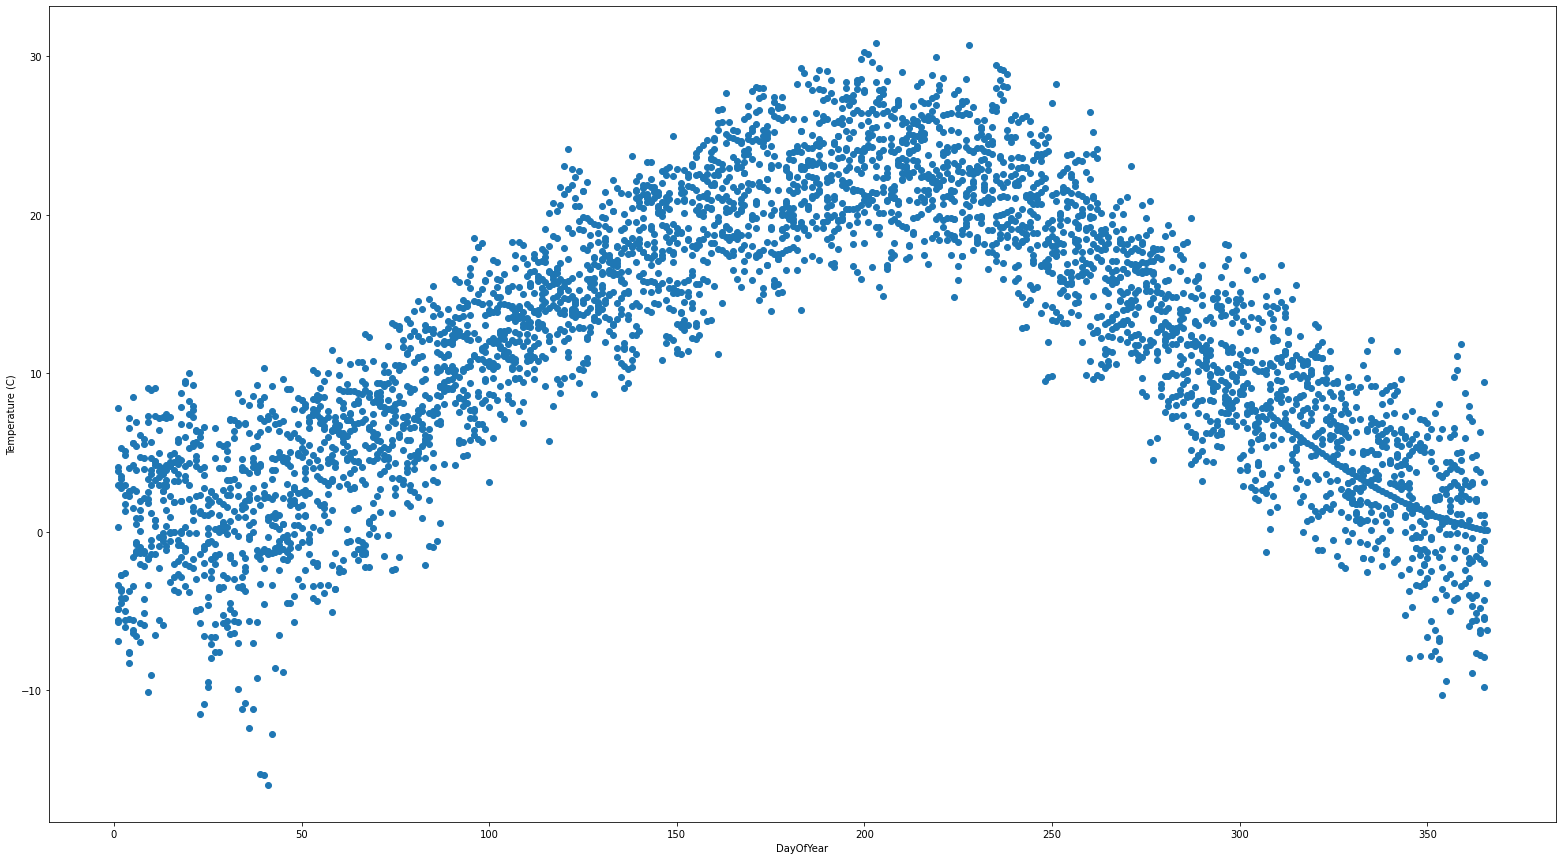

In [44]:
fig = plt.figure(figsize=(27, 15))
plt.scatter(temperature_average['DayOfYear'], temperature_average['Temperature (C)'])
plt.xlabel('DayOfYear')
plt.ylabel('Temperature (C)')

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(temperature_average['DayOfYear'],
                                                    temperature_average['Temperature (C)'], test_size=0.1)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

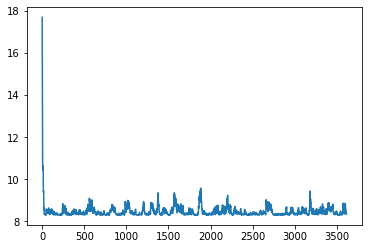

In [50]:
model = PerceptronWeather()
loss = model.fit(X_train, Y_train)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(loss)

In [51]:
model.evaluation(X_test, Y_test)
day = 45
t = model.predict(day)
t = t.reshape(1)
print(f'temperature on the {day}th day of the year: {t}')

temperature on the 45th day of the year: [2.59811687]
